The Fourier Series is given by 
$$
    y(x) = \frac{a_0}{2} + \sum_{n=1}^\infty a_n \cos(k_n x) + b_n \sin(k_n x)
$$

For an odd triangular wave, the series will only include $b_n$ terms, as sine is an odd function while cosine is even. The average value of the triangle wave given in Fig. 8.P.1 of Waves and Oscillations is 0, so $a_0 = 0$. The periodicity $\lambda$ is to $T$, corresponding to a single complete cycle. Therefore, solving for the coefficient $b_n$:
$$
b_n = \frac{2}{\lambda} \int_0^\lambda \sin (k_n x) y(x) dx \text{ , where } k_n = \frac{2\pi n}{\lambda}
$$
$$
b_n = \frac{2}{T} \int_0^T \sin\left(\frac{2\pi n x }{T}\right) y(x) dx
$$
As y(x) is an odd triangular function, we can break it down into piecewise components: 

$$
y(x) = \begin{cases} 
      x\left( \frac{4A}{T}\right) & 0 \leq x \leq \frac{T}{4} \\
      A-\left( x - \frac{T}{4} \right)\left( \frac{4A}{T}\right) & \frac{T}{4}\leq x\leq \frac{3T}{4} \\
      -A \left( x - \frac{3T}{4} \right)\left( \frac{4A}{T}\right)  & \frac{3T}{4}\leq x \leq T 
   \end{cases}
$$
The integral becomes 
$$
    \begin{aligned}
    b_n = 
    &\frac{2}{T}\int_{0}^{\frac{T}{4}} \sin\left(\frac{2\pi nx}{T}\right) x \left(\frac{4A}{T}\right) \, dx + \\ &\frac{2}{T}\int_{\frac{T}{4}}^{\frac{3T}{4}} \sin\left(\frac{2\pi nx}{T}\right) \left(A - \left(x - \frac{T}{4}\right)\left(\frac{4A}{T}\right)\right) \, dx + \\ &\frac{2}{T}\int_{\frac{3T}{4}}^{T} \sin\left(\frac{2\pi nx}{T}\right) \left(-A + \left(x - \frac{3T}{4}\right)\left(\frac{4A}{T}\right)\right) \, dx
\end{aligned}
$$
Evaluating the integral, 
$$
    \begin{aligned}
    b_n = 
    &\frac{A\left(2 \sin \left(\frac{\pi n}{2}\right)-\pi n \cos \left(\frac{\pi n}{2}\right)\right)}{\pi^2 n^2} + \\
    & \frac{A\left(\pi n \cos \left(\frac{\pi n}{2}\right)+\pi n \cos \left(\frac{3 \pi n}{2}\right)+2 \sin \left(\frac{\pi n}{2}\right)-2 \sin \left(\frac{3 \pi n}{2}\right)\right)}{\pi^2 n^2} + \\
    & \frac{A\left(4 \pi n-4 \pi n \cos (2 \pi n)-\pi n \cos \left(\frac{3 \pi n}{2}\right)+2 \sin (2 \pi n)-2 \sin \left(\frac{3 \pi n}{2}\right)\right)}{\pi^2 n^2}
    \end{aligned}
$$
Simplifying, 
$$
    b_n  = \frac{4 \pi A n-4 \pi A n \overbrace{\cos (2 \pi n)}^{\text{always equals 1}}+ 2 A \overbrace{\sin (2 \pi n)}^{\text{always equals 0}}+4 A \sin \left(\frac{\pi n}{2}\right)-4 A \sin \left(\frac{3 \pi n}{2}\right)}{\pi^2 n^2}
$$
We see sinusoids with $2\pi n$ as arguments always equal 0 or 1 for all integers n. Identifying a pattern for the behavior of the remaining sinusoids,
$$
    \sin\left( \frac{\pi n}{2}\right) - \sin\left( \frac{3\pi n}{2}\right)= \begin{cases} 
      0 & n = 0,4... \\
      2 & n= 1,5... \\
      0 & n = 2,6...\\
      -2 & n = 3,7...
    \end{cases} = \begin{cases}
        0 & \text{for even n} \\
        2 \cdot (-1)^{\frac{n-1}{2}} & \text{for odd n}
    \end{cases}
$$
Therefore, we can express coefficient $b_n$ as 
$$
    b_n = \frac{8A}{\pi^2} \sum_{n=1,3,5...}^\infty \frac{(-1)^{\frac{n-1}{2}}}{{n^2}}
$$
Our Fourier Series representation for the odd triangular wave is given by
$$
    y(x) = \frac{8A}{\pi^2} \sum_{n=1,3,5...}^\infty \frac{(-1)^{\frac{n-1}{2}}}{{n^2}} \sin \left( \frac{2 \pi n x}{T}\right)
$$

Looking at the first three terms of the summation, 
$$
    y(x) \approx \frac{8A}{\pi^2} \cdot \sin \left( \frac{2 \pi x}{T}\right) - \frac{8A}{9\pi^2} \cdot \sin \left( \frac{6 \pi x}{T}\right) + \frac{8A}{25\pi^2} \cdot \sin \left( \frac{10 \pi x}{T}\right)
$$

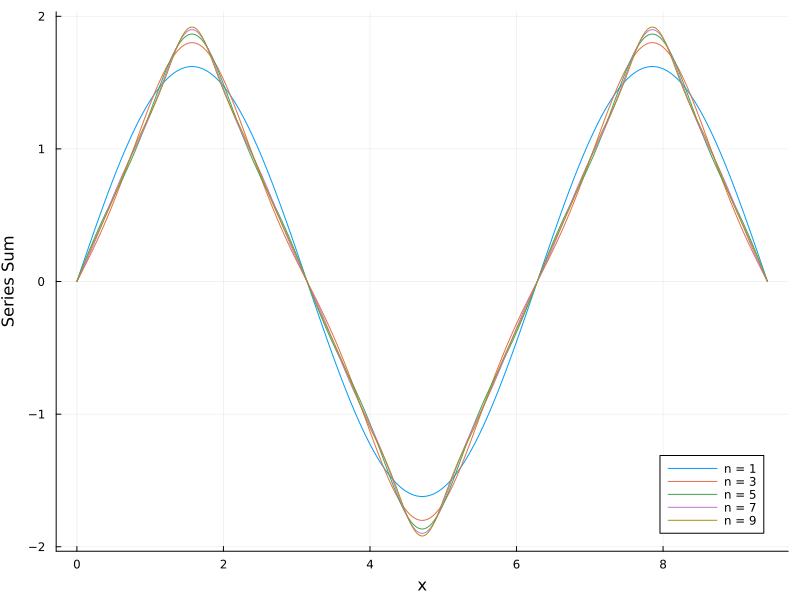

In [1]:
using Pkg
using Plots
using Printf

A = 2
T = 2 * π
xleft = 0
xright = 3 * T / 2

x = range(xleft, xright, length=400)

function series_sum(x, n_max, A, T)
    sum = zeros(length(x))
    for n in 1:2:n_max
        sum += ((-1)^((n-1) ÷ 2) / n^2) .* sin.(2 * π * n .* x / T)
    end
    return (8 * A / π^2) * sum
end

p = plot(xlabel="x", ylabel="Series Sum", legend=:bottomright, size=(800,600))
for n_max in [1, 3, 5, 7, 9]
    plot!(x, series_sum(x, n_max, A, T), label=@sprintf("n = %d", n_max))
end
p |> display